# DLE303 Assessment 3 - Main
## Rachel Tucker & Michael Cuffe
## Dependencies:
- Python 3.12

In [21]:
# > null 2>&1 removes the output
!pip install transformers   > null 2>&1
!pip install tensorflow     > null 2>&1
!pip install torch          > null 2>&1
!pip install pandas         > null 2>&1
!pip install numpy          > null 2>&1
!pip install matplotlib     > null 2>&1
!pip install seaborn        > null 2>&1

# import libraries

In [22]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data

In [23]:
# Load the dataset
data = pd.read_csv('data/200k_Short_Texts.csv')
data = data.dropna()
data = data.sample(frac=1).reset_index(drop=True)

In [24]:
# Print the first 10 rows of the dataset
print(data.head(10))

                                                text  humor
0  North korea attempts but fails to launch missi...  False
1  My body is a temple only because it hates pale...   True
2  Eddie redmayne is as smooth as velvet at the 2...  False
3  Be a superhero: help bring the epidemic of oba...  False
4  One year anniversary: huffpost weddings celebr...  False
5  Puppy abandoned in mcdonald's dumpster now wea...  False
6  Canada day isn't about cheap jokes, you guys. ...   True
7  Did you know the packers were trump supporters...   True
8  Here's the trailer for adam sandler's 'the rid...  False
9  This platform resists gentrification by giving...  False


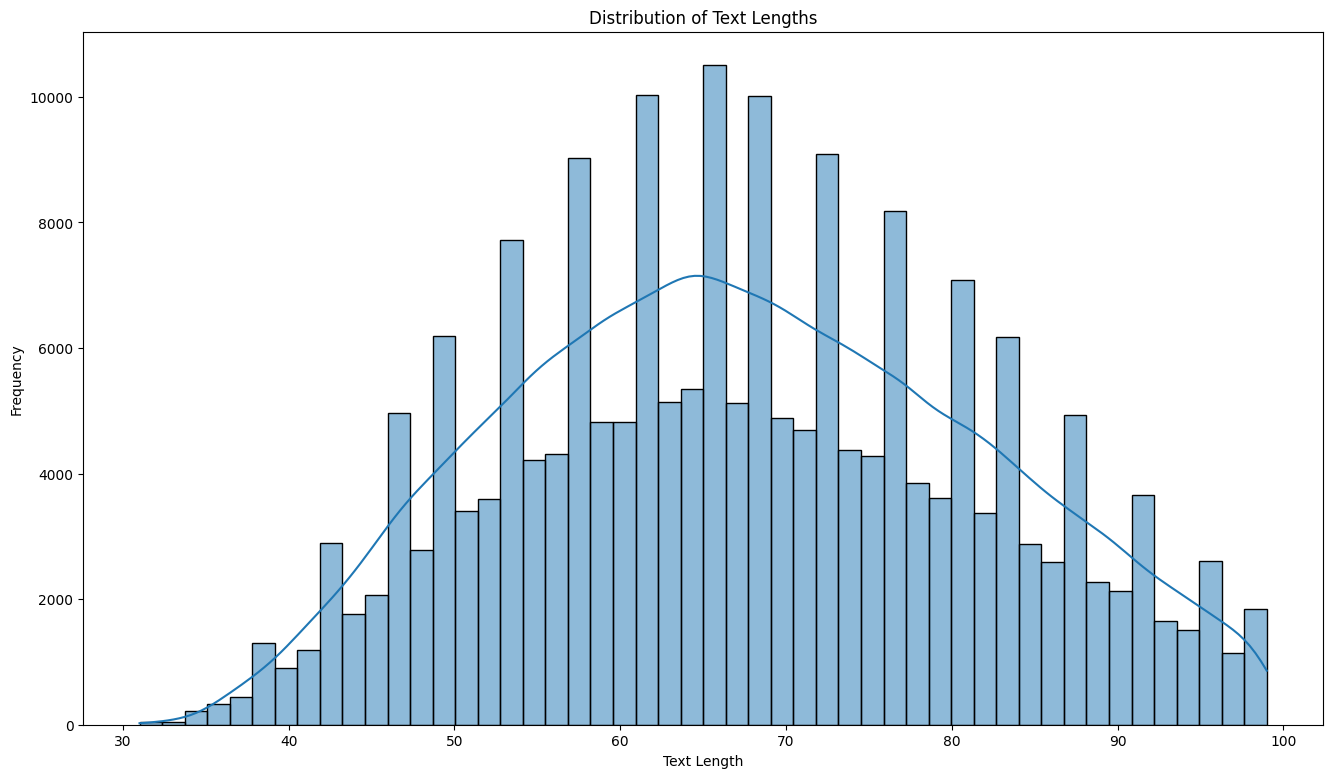

In [25]:
# Print the shape of the dataset
data['text_length'] = data['text'].apply(len)
# Ratio 16:9 for the graph
plt.figure(figsize=(16, 9))
# Plot the distribution of text lengths
sns.histplot(data['text_length'], bins=50, kde=True)
# Set the title, x-axis label, and y-axis label
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

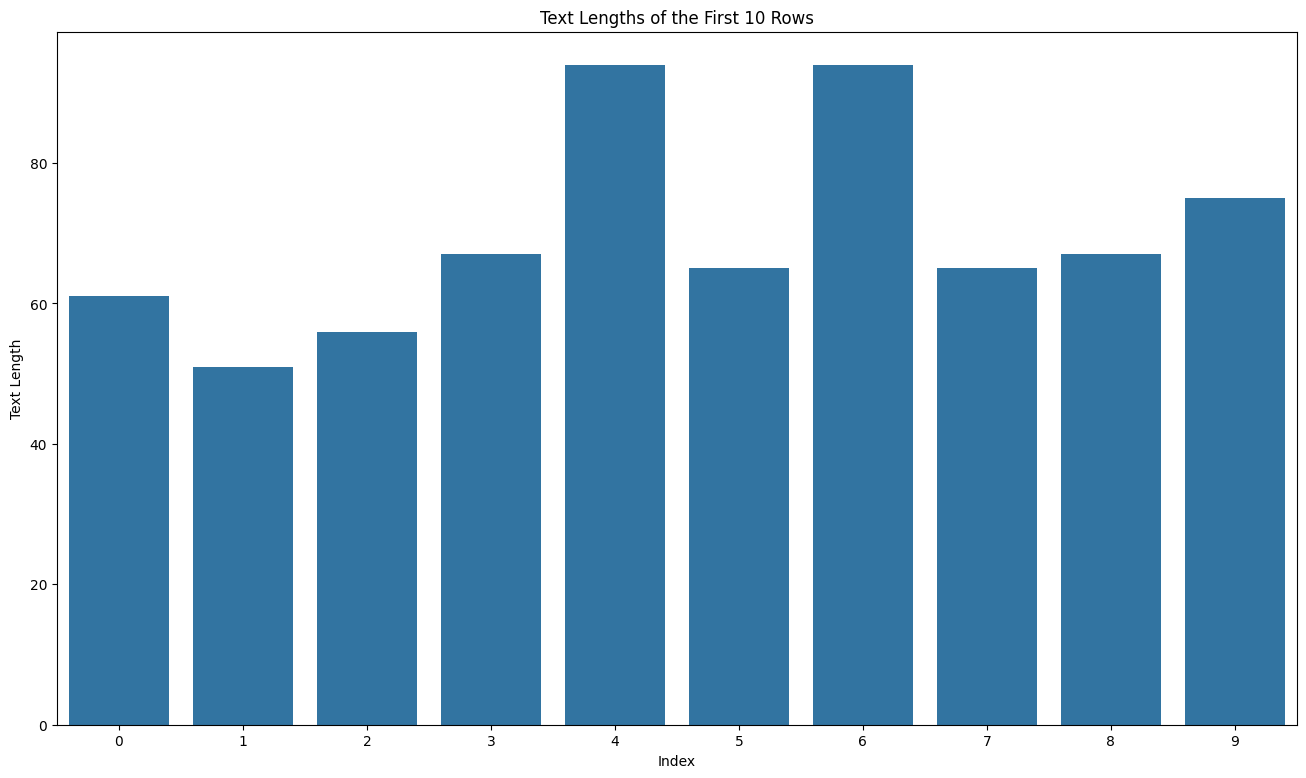

In [26]:
# Plot the first 10 rows of the dataset
plt.figure(figsize=(16, 9))
sns.barplot(x=data.index[:10], y=data['text_length'][:10])
plt.title('Text Lengths of the First 10 Rows')
plt.xlabel('Index')
plt.ylabel('Text Length')
plt.show()

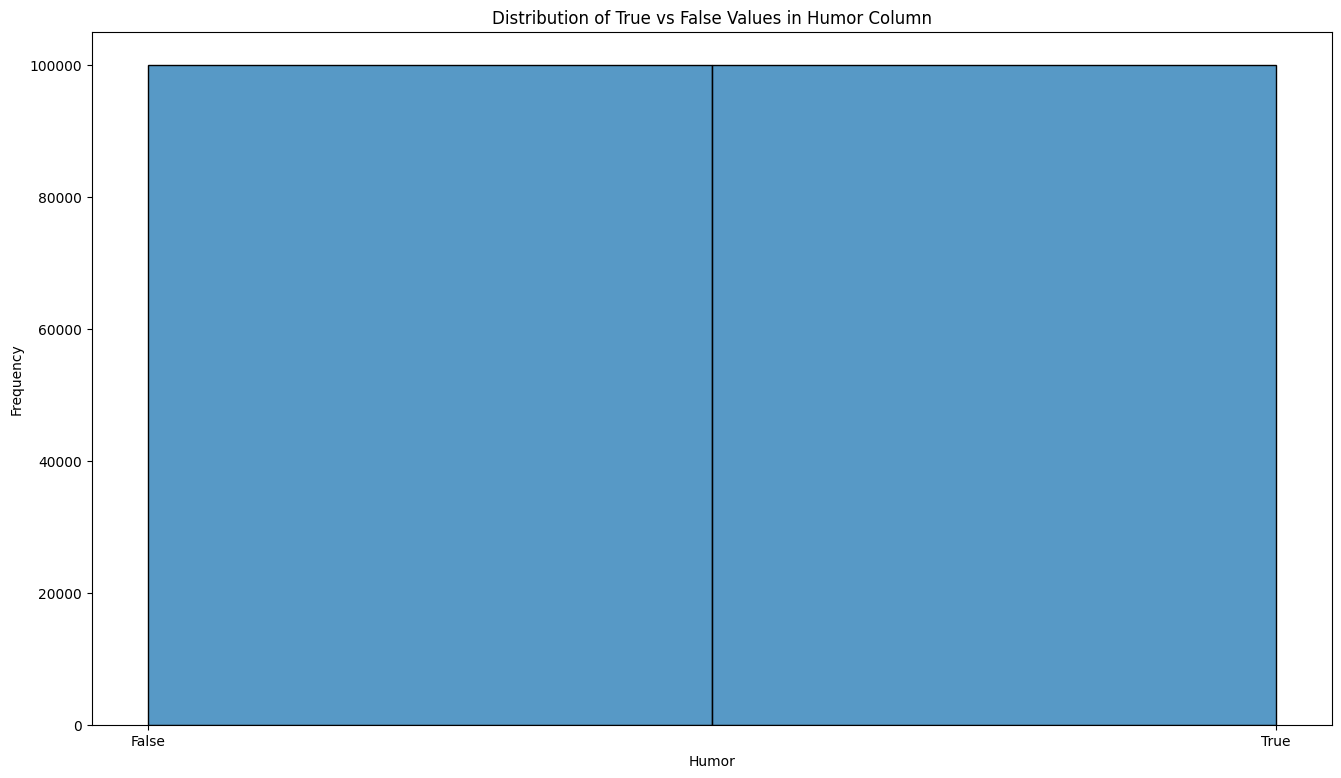

In [27]:
plt.figure(figsize=(16, 9))
sns.histplot(data['humor'], bins=2, kde=False)
plt.title('Distribution of True vs False Values in Humor Column')
plt.xlabel('Humor')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['False', 'True'])
plt.show()